In [ ]:
from pyincore.analyses.buildingportfolio.recovery.BuildingPortfolioRecoveryAnalysis import \
    BuildingPortfolioRecoveryAnalysis

from pyincore import InsecureIncoreClient

In [ ]:
client = InsecureIncoreClient("http://incore2-services.ncsa.illinois.edu:8888", "incrtest")

In [ ]:
bldg_data_dataset = "5c756966c11bb369a33a0b0a"
occupancy_dataset = "5c7569f9c11bb369a33a0b16"
bldg_damage_dataset = "5c756a2fc11bb369a33a0b22"
mean_repair_dataset = "5c756ac5c11bb369a33a0b34"
utility_dataset = "5c756af4c11bb369a33a0b40"
utility_partial_dataset = "5c756b1ec11bb369a33a0b4c"
coefFL_dataset = "5c756b56c11bb369a33a0b58"

In [ ]:
bldg_portfolio_recovery = BuildingPortfolioRecoveryAnalysis(client)
bldg_portfolio_recovery.set_parameter("uncertainty", True)
bldg_portfolio_recovery.set_parameter("sample_size", 35)  # default none. Gets size form input dataset
bldg_portfolio_recovery.set_parameter("random_sample_size", 50)  # default 10000
bldg_portfolio_recovery.set_parameter("no_of_weeks", 100)  # default 250
# bldg_portfolio_recovery.set_parameter("num_cpu", 1) Parallelization isn't implemented 

In [ ]:
bldg_portfolio_recovery.load_remote_input_dataset("building_data", bldg_data_dataset)
bldg_portfolio_recovery.load_remote_input_dataset("occupancy_mapping", occupancy_dataset)
bldg_portfolio_recovery.load_remote_input_dataset("building_damage", bldg_damage_dataset)
bldg_portfolio_recovery.load_remote_input_dataset("dmg_ratios", mean_repair_dataset)
bldg_portfolio_recovery.load_remote_input_dataset("utility", utility_dataset)
bldg_portfolio_recovery.load_remote_input_dataset("utility_partial", utility_partial_dataset)
bldg_portfolio_recovery.load_remote_input_dataset("coefFL", coefFL_dataset)

In [ ]:
# Creates two output files building-recovery.csv and portfolio-recovery.csv
bldg_portfolio_recovery.run_analysis()

## Visualization Starts

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_buildings = pd.read_csv('building-recovery.csv', delimiter=',')
df_portfolio = pd.read_csv('portfolio-recovery.csv', delimiter=',')

#### Trajectory at Portfolio Level

In [ ]:
# Restricted Entry, Restricted Use, Reoccupancy, Best Line Functionality, Full Functionality
# (RE,RU,RO,BF,FF) at portfolio level

df_portfolio.RecPercent_RE.plot(color='g')
df_portfolio.RecPercent_RU.plot(color='b')
df_portfolio.RecPercent_RO.plot(color='orange')
df_portfolio.RecPercent_BF.plot(color='r')
df_portfolio.RecPercent_FF.plot(color='y')

#### Portfolio Recovery Graph

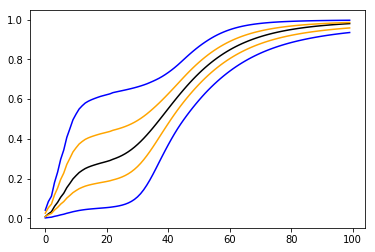

In [31]:
# Mean Recovery vs +/-95% Bounds vs +/- 75% Bounds

df_portfolio["Recovery_Percent_Func_Probability"].plot(color='black')
df_portfolio["95P_Upper_Bound"].plot(color='b')
df_portfolio["95P_Lower_Bound"].plot(color='b')
df_portfolio["75P_Upper_Bound"].plot(color='orange')
df_portfolio["75P_Lower_Bound"].plot(color='orange')

#### Buildings Recovery Per week

In [ ]:
# Ex: week 55
sns.relplot(x="Building_Lon", y="Building_Lat", size="55", data=df_buildings,
alpha=.5, palette="muted",height=7, sizes=(10, 200))